In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
parent_path = r'C:\Users\rahul\OneDrive\Desktop\Courses\ECE209as\Final Project\label-reg-master\labelreg\ibsr v2\data_final/'
img_fix_dir = parent_path + './test/fixed_images/case_006.nii'
img_mov_dir = parent_path + './test/moving_images/case_006.nii'
img_warp_dir = parent_path + './inference_results/Original2_results/warped_image6.nii'
imgpr_warp_dir = parent_path + './inference_results/Pruned2_results/warped_image6.nii'
imgprtr_warp_dir = parent_path + './inference_results/Pruned_retrain2_results/warped_image6.nii'
imgqnt_warp_dir = parent_path + './inference_results/Quantized2_results/warped_image6.nii'
img_fix = nib.load(img_fix_dir)
img_mov = nib.load(img_mov_dir)
img_warp = nib.load(img_warp_dir)
imgpr_warp = nib.load(imgpr_warp_dir)
imgprtr_warp = nib.load(imgprtr_warp_dir)
imgqnt_warp = nib.load(imgqnt_warp_dir)

In [2]:
print(img_fix.shape)
print(img_mov.shape)
print(img_warp.shape)
print(imgpr_warp.shape)
print(imgprtr_warp.shape)
print(imgqnt_warp.shape)

(64, 64, 32)
(64, 64, 32)
(64, 64, 32, 1)
(64, 64, 32, 1)
(64, 64, 32, 1)
(64, 64, 32, 1)


Text(0.5, 0, 'Warped Image')

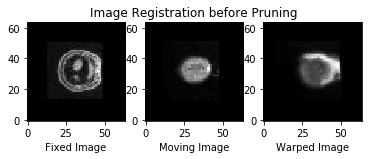

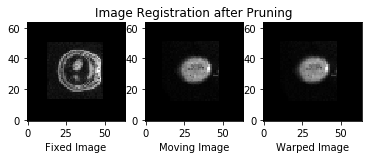

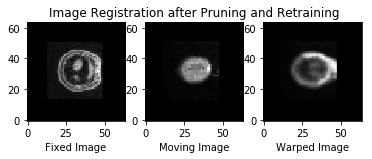

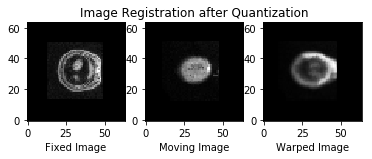

In [3]:
img_fix_data = img_fix.get_fdata()
img_mov_data = img_mov.get_fdata()
img_warp_data = img_warp.get_fdata()
imgpr_warp_data = imgpr_warp.get_fdata()
imgprtr_warp_data = imgprtr_warp.get_fdata()
imgqnt_warp_data = imgqnt_warp.get_fdata()
n = 1
slice1  = img_fix_data[:,:,n]
slice2 = img_mov_data[:,:,n]
slice3 = img_warp_data[:,:,n,0]
slice4 = imgpr_warp_data[:,:,n,0]
slice5 = imgprtr_warp_data[:,:,n,0]
slice6 = imgqnt_warp_data[:,:,n,0]
fig1 = plt.figure()
plt.subplot(1,3,1)
plt.imshow(slice1,cmap="gray", origin="lower")
plt.xlabel('Fixed Image')
plt.subplot(1,3,2)
plt.imshow(slice2,cmap="gray", origin="lower")
plt.xlabel('Moving Image')
plt.title('Image Registration before Pruning')
plt.subplot(1,3,3)
plt.imshow(slice3,cmap="gray", origin="lower")
plt.xlabel('Warped Image')

#fig1.tight_layout()
#fig1.savefig('img_reg_bef_pr3.png')

fig2 = plt.figure()
plt.subplot(1,3,1)
plt.imshow(slice1,cmap="gray", origin="lower")
plt.xlabel('Fixed Image')
plt.subplot(1,3,2)
plt.imshow(slice2,cmap="gray", origin="lower")
plt.xlabel('Moving Image')
plt.title('Image Registration after Pruning')
plt.subplot(1,3,3)
plt.imshow(slice4,cmap="gray", origin="lower")
plt.xlabel('Warped Image')

#fig2.tight_layout()
#fig2.savefig('img_reg_af_pr3.png')

fig3 = plt.figure()
plt.subplot(1,3,1)
plt.imshow(slice1,cmap="gray", origin="lower")
plt.xlabel('Fixed Image')
plt.subplot(1,3,2)
plt.imshow(slice2,cmap="gray", origin="lower")
plt.xlabel('Moving Image')
plt.title('Image Registration after Pruning and Retraining')
plt.subplot(1,3,3)
plt.imshow(slice5,cmap="gray", origin="lower")
plt.xlabel('Warped Image')

#fig3.tight_layout()
#fig3.savefig('img_reg_af_prtr.png')

fig4 = plt.figure()
plt.subplot(1,3,1)
plt.imshow(slice1,cmap="gray", origin="lower")
plt.xlabel('Fixed Image')
plt.subplot(1,3,2)
plt.imshow(slice2,cmap="gray", origin="lower")
plt.xlabel('Moving Image')
plt.title('Image Registration after Quantization')
plt.subplot(1,3,3)
plt.imshow(slice5,cmap="gray", origin="lower")
plt.xlabel('Warped Image')

#fig3.tight_layout()
#fig4.savefig('img_reg_qnt.png')

#slice_t1 = [slice1,slice2,slice3]
#slice_t2 = [slice1,slice2,slice4]
#slice_t3 = [slice1,slice2,slice5]
#show_slices(slice_t1)
#show_slices(slice_t2)
#show_slices(slice_t3)

In [4]:
import os
import numpy as np
import nibabel as nib
parent_path = r'C:\Users\rahul\OneDrive\Desktop\Courses\ECE209as\Final Project\label-reg-master\labelreg\ibsr v2\data_final/'
lab_fix_dir = parent_path + './test/fixed_labels/case_002.nii'
lab_fix = nib.load(lab_fix_dir)
print(lab_fix.shape)

(64, 64, 32)


Text(0.5, 0, 'Label 23')

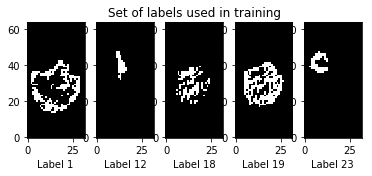

In [5]:
lab_fix_data = lab_fix.get_fdata()
slices = []
test_labels = [1,12,18,19,23]
idx = [40,32,20,20,27]
for i,lab_idx in enumerate(test_labels):
    mask = (lab_fix_data.astype('int')==lab_idx)
    arr = mask.astype('float')
    slices.append(arr[idx[i],:,:])
    
fig5 = plt.figure()
plt.subplot(1,5,1)
plt.imshow(slices[0],cmap="gray", origin="lower")
plt.xlabel('Label 1')
plt.subplot(1,5,2)
plt.imshow(slices[1],cmap="gray", origin="lower")
plt.xlabel('Label 12')
plt.subplot(1,5,3)
plt.imshow(slices[2],cmap="gray", origin="lower")
plt.xlabel('Label 18')
plt.title('Set of labels used in training')
plt.subplot(1,5,4)
plt.imshow(slices[3],cmap="gray", origin="lower")
plt.xlabel('Label 19')
plt.subplot(1,5,5)
plt.imshow(slices[4],cmap="gray", origin="lower")
plt.xlabel('Label 23')

#fig5.savefig('labels_plot.png')